In [1]:
from file_cache import *

2020-08-05 17:02:48,859 util_log.py[153] INFO Start the program at:amax7, 127.0.1.1, with:Load module


File_cache: Adjust notebook work fold to:/share/felix/pj/thyroid_seg/


In [2]:
test = pd.read_csv('./output/test_a82bb47_item.csv', header=None)

valid = pd.read_csv('./output/valid_a82bb47_item.csv', header=None)

In [3]:
test_np = glob('./output/test*7635874*.*')[0]

valid_np = glob('./output/valid*7635874*.*')[0]

test_np =np.load(test_np)

valid_np =np.load(valid_np)

test_np.shape, valid_np.shape

((910, 2, 224, 224), (757, 2, 224, 224))

In [4]:
'input/TNSCUI2020_train/mask'

'input/TNSCUI2020_train/mask'

In [5]:

import numpy as np
from sklearn.metrics import jaccard_score

iou_list = []
raw_size = []
raw_per =[]
for file, mask in tqdm(zip(valid.iloc[:,1], valid_np[:,1,:,:,]), total=len(valid)):
    mask = np.where(mask>=0.5, 1, 0).astype(int)
    shape = cv2.imread(file, cv2.COLOR_BGR2GRAY).shape
    #print(shape,  mask.shape)
    #plt.imshow(mask)
    #plt.show()
    mask = cv2.resize(mask, tuple(reversed(shape)), interpolation =cv2.INTER_NEAREST)
    
    
    mask_list = []
    mask_list.append(mask.astype(int))
    mask_list.append(cv2.imread(file.replace('image', 'mask'), cv2.COLOR_BGR2GRAY))
    #show_img_list(mask_list, col=2)
    
    #print(mask_list[0].flatten().shape, mask_list[1].flatten().shape)
    score = jaccard_score(mask_list[0].flatten(), mask_list[1].flatten())
    #print(score)
    
    raw_size.append(mask_list[1].sum())
    raw_per.append(mask_list[1].sum()/len(mask_list[1].flatten()))
    iou_list.append(score)
     
    

In [6]:
tqdm

<function tqdm.tqdm_notebook(*args, **kwargs)>

In [7]:
valid['score']=iou_list
valid['raw_size']=raw_size
valid['raw_per']=raw_per
valid['pixel_count'] = pd.qcut(valid.raw_size, 20)
valid.sort_values('raw_size')

,0,1,score,raw_size,raw_per,pixel_count
599,599,///home/felix/pj/thyroid_seg/input/TNSCUI2020_...,0.372378,274,0.001623,"(273.999, 1858.2]"
349,349,///home/felix/pj/thyroid_seg/input/TNSCUI2020_...,0.769231,387,0.002797,"(273.999, 1858.2]"
372,372,///home/felix/pj/thyroid_seg/input/TNSCUI2020_...,0.424066,664,0.001750,"(273.999, 1858.2]"
282,282,///home/felix/pj/thyroid_seg/input/TNSCUI2020_...,0.000000,779,0.004533,"(273.999, 1858.2]"
690,690,///home/felix/pj/thyroid_seg/input/TNSCUI2020_...,0.369025,944,0.003871,"(273.999, 1858.2]"
...,...,...,...,...,...,...
506,506,///home/felix/pj/thyroid_seg/input/TNSCUI2020_...,0.898659,198783,0.417734,"(137092.8, 229714.0]"
40,40,///home/felix/pj/thyroid_seg/input/TNSCUI2020_...,0.883784,199156,0.515034,"(137092.8, 229714.0]"
392,392,///home/felix/pj/thyroid_seg/input/TNSCUI2020_...,0.635657,212500,0.720183,"(137092.8, 229714.0]"
435,435,///home/felix/pj/thyroid_seg/input/TNSCUI2020_...,0.790668,218398,0.498380,"(137092.8, 229714.0]"


In [8]:
valid.groupby('pixel_count').score.agg(['mean', 'count'])

,mean,count
pixel_count,,
"(273.999, 1858.2]",0.429118,38
"(1858.2, 2995.2]",0.459119,38
"(2995.2, 3739.6]",0.444559,38
"(3739.6, 4630.0]",0.542041,38
"(4630.0, 5863.0]",0.513506,38
"(5863.0, 6998.6]",0.540551,37
"(6998.6, 8521.0]",0.510178,38
"(8521.0, 10538.2]",0.644133,38
"(10538.2, 12524.0]",0.523653,38


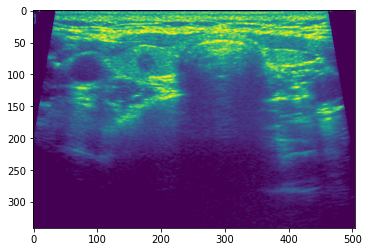

In [9]:
plt.imshow(plt.imread(valid.loc[282,1]))